In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import time
from JuliaODE import*
from JuliaGyroSolver import*
from JuliaPhysicalQTE import*

import diffeqpy
from diffeqpy import de, ode

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


  Activating project at `~/.julia/environments/diffeqpy`
  Activating project at `~/.julia/environments/diffeqpy`


In [7]:
g = 9.81           # m/s^2
m = 0.375          # kg
J3 = 0.000055      # kg.m^2
J1 = 0.000055      # kg.m^2
h = 31.25 * 1e-3   # m
x0 =  0.1
f_exc = 0.265 
Phi = np.pi

params = [g, m, h, J1, J3 , x0, Phi, f_exc]
CI = [np.pi / 6, 0, 0, 0, 0, 2 * np.pi * 200]

p_psi0 = J3 * CI[-1]

Gyro_Carac_Values(params, CI)

Larmor Pulsation (th) :               +1.663
Larmor Frequency (th) :               +0.265
Larmor Period (th) :               +3.777 

Rabi Pulsation (th) :               +0.024
Rabi Period (th) :             +267.331
Temps de montée (th) :             +133.666 

Rapport des pulsations Larmor/Rabi :              +70.770 

Rapport Approx Gyroscopique :          +14_912.892 



In [10]:
tspan = (0., 500.)

t1 = time()

t, the, the_d, phi, phi_d, psi, psi_d = Gyro_Solver(tspan, CI, params, forcing='XY')

t2 = time()
print('Duration =', t2-t1)

Duration = 0.5109190940856934


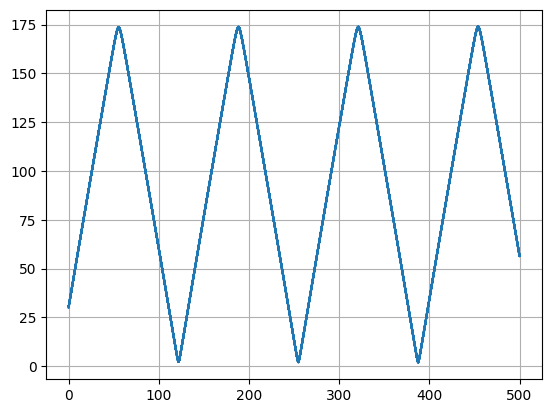

In [11]:
plt.figure()
plt.plot(t, the * 180 / np.pi)
plt.grid()

### Chevrons de Rabi :

In [18]:
f_L_0 = 0.265  #1.059 

tab_t_burst = np.linspace(0, 101, 101, endpoint=True)
tab_exc_freq = np.linspace(0.85 * f_L_0, 1.15 * f_L_0, 101, endpoint=True)

In [16]:
t1 = time()

tab_theta, list_the, list_t = Rabi_Chevron(tab_exc_freq, tab_t_burst,  params, CI, forcing='XY')

t2 = time()
print('Duration =', t2-t1)

Duration = 199.58104610443115


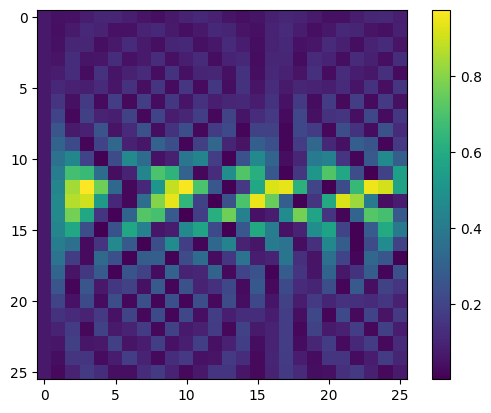

In [17]:
plt.figure()
#plt.imshow(tab_theta)
plt.imshow((1 - np.cos(tab_theta) )/ 2 )
plt.colorbar()

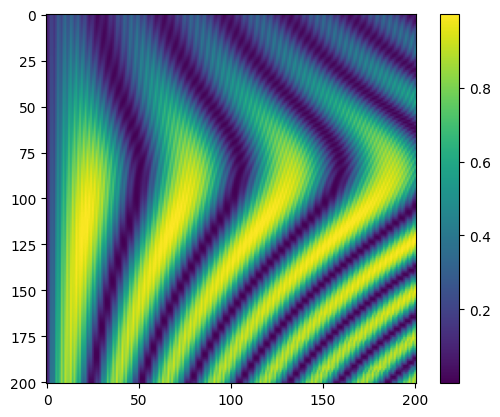

In [20]:
plt.figure()
#plt.imshow(tab_theta)
plt.imshow((1 - np.cos(tab_theta) )/ 2 )
plt.colorbar()

In [27]:
s = 0
for T in list_t:
    s += np.sum(T[-1] == 10 )

print(s)

201


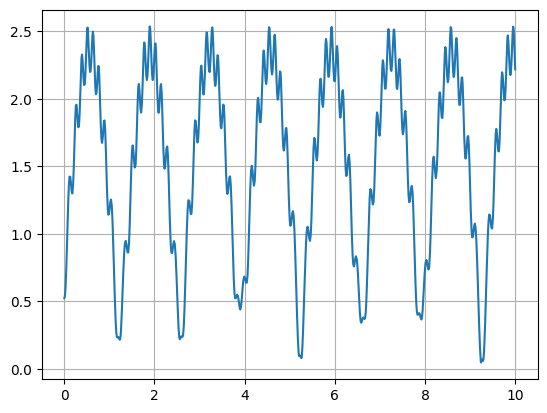

In [28]:
k = -1

plt.figure()
plt.grid()
plt.plot(list_t[k], list_the[k])